In [1]:
import yaml
import argparse

import os
import torch

import torch.optim as optim

from dataloaders import get_dataloader

from classifier import Classifier
from utils import normalize_array


from training import Trainer


import torchvision.utils as vutils  # Import make_grid
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to load config from YAML file
def load_config(yaml_file):
    with open(yaml_file, 'r') as file:
        config = yaml.safe_load(file)
    return config

In [3]:
import torch
import yaml  # Assuming you use YAML for configuration

# Hardcode the config path or use input() to ask for it in the notebook
config_path = "config.yaml"

# Load configuration from YAML file
def load_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

config = load_config(config_path)

# Setup the device (CUDA or CPU)
device = torch.device(config['device'] if torch.cuda.is_available() else "cpu")

# Load training parameters from config
batch_size = config['batch_size']
lr = config['lr']
beta_1 = config['beta_1']
beta_2 = config['beta_2']
betas = (beta_1, beta_2)

epochs = config['epochs']

# Load data paths from config and select the first one
data_paths = config['data_paths']


In [4]:
    def imshow(img):
        #img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
        plt.show()

In [5]:
train_loader, test_loader = get_dataloader(paths_to_data=data_paths, batch_size=batch_size, standarization=config['standarization'])

In [6]:
dataiter = iter(train_loader)
particle, defocus  = next(dataiter)
print(defocus,defocus.min(),defocus.max())

defocus = list(defocus.numpy())

tensor([19, 48, 47, 11,  8, 27, 30, 33, 46, 23, 23, 48, 38, 18,  0,  8, 23, 13,
        20,  9, 11, 12, 32, 32, 14, 14, 37, 14,  3, 24, 41, 26]) tensor(0) tensor(48)


In [7]:
for i in range(len(defocus)):
    if defocus[i] == 49:
        print(i)
        imshow(particle[i])

In [8]:
particle=particle.float()
classifier = Classifier(50)
classifier(particle)

tensor([[-0.0165, -0.0543, -0.0606,  ..., -0.0474, -0.0465, -0.0560],
        [-0.0189, -0.0524, -0.0578,  ..., -0.0468, -0.0501, -0.0567],
        [-0.0205, -0.0526, -0.0566,  ..., -0.0447, -0.0492, -0.0539],
        ...,
        [-0.0185, -0.0545, -0.0622,  ..., -0.0430, -0.0490, -0.0558],
        [-0.0204, -0.0522, -0.0613,  ..., -0.0451, -0.0486, -0.0592],
        [-0.0180, -0.0529, -0.0591,  ..., -0.0465, -0.0484, -0.0537]],
       grad_fn=<AddmmBackward0>)

In [9]:
    outputs = classifier(particle)
    _, predicted = torch.max(outputs, 1)
print(predicted)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4])


In [10]:

# Instantiate and test  FOR THE CLASSIFIER
num_classes = 50  # Replace with your number of classes
model = Classifier(num_classes)

# Example input: Grayscale image (batch_size=1, channels=1, height=200, width=200)
input_tensor = torch.rand(1, 1, 200, 200)
output = model(input_tensor)
print(output.shape)  # Should output (1, num_classes)
print(output)


torch.Size([1, 50])
tensor([[ 0.0076,  0.0053,  0.0135, -0.0313, -0.0255,  0.0429,  0.0381,  0.0696,
          0.0273, -0.0174, -0.0400,  0.0357,  0.0344,  0.0677,  0.0038,  0.0361,
         -0.0458, -0.0504,  0.0025,  0.0140,  0.0452,  0.0146, -0.0511, -0.0589,
         -0.0548,  0.0593, -0.0386, -0.0757,  0.0553, -0.0380,  0.0501,  0.0267,
         -0.0083, -0.0340, -0.0245,  0.0237,  0.0006,  0.0006, -0.0440,  0.0438,
         -0.0255,  0.0297,  0.0271,  0.0224,  0.0476,  0.0033,  0.0437,  0.0036,
          0.0244,  0.0661]], grad_fn=<AddmmBackward0>)


In [23]:
PATH = './classifier_CNN.pth'
model.load_state_dict(torch.load(PATH, weights_only=True))

/home/o.liagkas/miniconda3/envs/cryo-wgan/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


<All keys matched successfully>

tensor([35, 28, 27, 28, 17, 21,  6, 31, 41, 46,  6,  8, 43, 20, 44, 20, 43,  0,
        42, 20, 28,  3, 25, 38,  2, 46, 23,  1,  7, 18, 19, 48])
tensor([[[-0.0588, -0.2627, -0.3569,  ..., -0.1529, -0.0980, -0.0275],
         [-0.1216, -0.2078, -0.3098,  ..., -0.0824, -0.0196, -0.1216],
         [-0.3333, -0.3882, -0.4196,  ...,  0.2157,  0.0824, -0.2706],
         ...,
         [-0.0353,  0.0353,  0.0902,  ...,  0.0745,  0.0510, -0.0039],
         [-0.2549, -0.2471, -0.2000,  ..., -0.0510, -0.2314, -0.2627],
         [-0.2392, -0.2627, -0.3255,  ...,  0.0118, -0.1373, -0.1843]]])


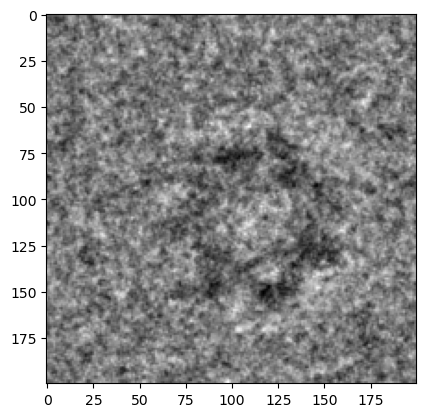

In [11]:
dataiter = iter(test_loader)
particle, defocus = next(dataiter)
print(defocus)
print(particle[0])
imshow(particle[0])

In [12]:
particle, defocus = next(dataiter)
print(defocus)
particle=particle.float()
_,predicted=torch.max(model(particle), 1)
print(predicted)

counter = 0
for i in range(32):
    if(defocus[i]==predicted[i]):
        counter+=1

print("Accuracy is:", counter/32)

tensor([46,  3,  5, 26,  8, 13,  0, 12,  6, 21, 45, 30, 30, 10,  2, 19, 21, 13,
         2, 36, 36, 49, 45, 17, 29, 40, 47, 17,  7, 26, 22, 25])
tensor([ 7, 49, 49,  7,  7,  7,  7, 49,  7,  7,  7,  7,  7,  7, 49,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 49,  7,  7])
Accuracy is: 0.03125


In [13]:
particle=particle.float()
torch.max(model(particle), 1)

torch.return_types.max(
values=tensor([0.0660, 0.0647, 0.0667, 0.0686, 0.0684, 0.0678, 0.0691, 0.0654, 0.0681,
        0.0665, 0.0674, 0.0664, 0.0686, 0.0686, 0.0656, 0.0669, 0.0679, 0.0686,
        0.0680, 0.0649, 0.0665, 0.0666, 0.0677, 0.0663, 0.0670, 0.0670, 0.0681,
        0.0665, 0.0665, 0.0657, 0.0680, 0.0669], grad_fn=<MaxBackward0>),
indices=tensor([ 7, 49, 49,  7,  7,  7,  7, 49,  7,  7,  7,  7,  7,  7, 49,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 49,  7,  7]))

In [14]:
print(len(test_loader.dataset))

2000


In [15]:
dataiter = iter(test_loader)
correct = 0
total = 0
counter = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        particle, defocus = data
        # calculate outputs by running images through the network
        outputs = model(particle)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += defocus.size(0)
        correct += (predicted == defocus).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 1 %


In [ ]:
########### THIS IS FOR THE REGRESSION PART!!!

In [16]:
from regressor import Regressor
from dataloaders import get_dataloader 

In [17]:
train_loader_REG, test_loader_REG = get_dataloader(paths_to_data=data_paths, type_='sequential' ,batch_size=batch_size, standarization=config['standarization'])

In [18]:
dataiter = iter(train_loader_REG)
particle, defocus  = next(dataiter)
print(defocus,defocus.min(),defocus.max())

defocus = (defocus - 230) / (328 - 230)
print(defocus)


tensor([290, 314, 238, 302, 300, 252, 236, 326, 252, 326, 266, 304, 290, 250,
        276, 254, 280, 316, 238, 236, 296, 318, 258, 238, 258, 314, 250, 248,
        320, 298, 268, 242]) tensor(236) tensor(326)
tensor([0.6122, 0.8571, 0.0816, 0.7347, 0.7143, 0.2245, 0.0612, 0.9796, 0.2245,
        0.9796, 0.3673, 0.7551, 0.6122, 0.2041, 0.4694, 0.2449, 0.5102, 0.8776,
        0.0816, 0.0612, 0.6735, 0.8980, 0.2857, 0.0816, 0.2857, 0.8571, 0.2041,
        0.1837, 0.9184, 0.6939, 0.3878, 0.1224])


In [19]:
print(defocus[6].item())

0.06122449040412903


In [20]:
for i in range(len(defocus)):
    if defocus[i] == 328:
        print(i)
        imshow(particle[i])

In [21]:
particle=particle.float()
regressor = Regressor()
regressor(particle).shape

torch.Size([32, 1])

In [22]:
modelr = Regressor()

In [23]:
PATH = './regressor_CNN.pth'
modelr.load_state_dict(torch.load(PATH, weights_only=True))

/home/o.liagkas/miniconda3/envs/cryo-wgan/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


<All keys matched successfully>

In [25]:
particle, defocus = next(dataiter)
defocus = (defocus - defocus.min()) / (defocus.max() - defocus.min())
#print(defocus)
particle=particle.float()
predicted=modelr(particle)
#print(predicted)
with torch.no_grad():
    counter = 0
    for i in range(32):
        print((defocus[i]-predicted[i]).item())
        counter += abs((defocus[i]-predicted[i]).item())

print("Average divergence from actual value:", counter/32)

-0.03001631796360016
-0.021124154329299927
-0.036921173334121704
-0.043392494320869446
-0.0059389472007751465
-0.022010624408721924
-0.006031215190887451
-0.02771472930908203
-0.007362484931945801
-0.0060762763023376465
-0.013852149248123169
-0.012624919414520264
-0.05613524094223976
-0.02996772527694702
-0.3839018940925598
-0.028245210647583008
-0.05894953012466431
-0.027506113052368164
-0.17115899920463562
0.010927677154541016
0.17759031057357788
-0.01907140016555786
-0.025682032108306885
-0.03843461349606514
0.0016230344772338867
-0.02321484684944153
-0.01889246702194214
-0.03678250312805176
0.00207364559173584
-0.015498638153076172
0.0011803507804870605
0.00978463888168335
Average divergence from actual value: 0.042802698677405715


In [52]:
    total = 0
    counter = 0
    with torch.no_grad():
        for data in test_loader_REG:
            particle, defocus = data
            defocus = (defocus - 230) / (328 - 230)
            # calculate outputs by running images through the network
            predicted = regressor(particle)
            #counter += torch.sum(torch.abs(defocus - predicted)).item()
            total += defocus.size()[0]
            for i in range(defocus.size()[0]):
                counter += (abs(defocus[i].item() - predicted[i].item()))
                print(defocus[i].item(), predicted[i].item())
                print('COUNTER:',counter,'TOTAL:',total)
            

    print("Average divergence from actual value:", counter/total)

0.8163265585899353 0.510571300983429
COUNTER: 0.30575525760650635 TOTAL: 32
0.6326530575752258 0.5111805200576782
COUNTER: 0.42722779512405396 TOTAL: 32
0.9387755393981934 0.5103304386138916
COUNTER: 0.8556728959083557 TOTAL: 32
0.36734694242477417 0.5106164813041687
COUNTER: 0.9989424347877502 TOTAL: 32
0.020408162847161293 0.5108166933059692
COUNTER: 1.4893509652465582 TOTAL: 32
0.5918367505073547 0.5111771821975708
COUNTER: 1.5700105335563421 TOTAL: 32
0.22448979318141937 0.5109684467315674
COUNTER: 1.8564891871064901 TOTAL: 32
0.9795918464660645 0.5105071663856506
COUNTER: 2.325573867186904 TOTAL: 32
0.918367326259613 0.5108218193054199
COUNTER: 2.733119374141097 TOTAL: 32
0.4285714328289032 0.5110476016998291
COUNTER: 2.815595543012023 TOTAL: 32
0.6734693646430969 0.5111895203590393
COUNTER: 2.9778753872960806 TOTAL: 32
0.18367347121238708 0.5112901926040649
COUNTER: 3.3054921086877584 TOTAL: 32
0.40816327929496765 0.510730504989624
COUNTER: 3.408059334382415 TOTAL: 32
0.510204076

In [54]:
print(torch.sum(torch.abs(defocus - predicted)).item(),defocus.size(),defocus.size()[0])

57.16168975830078 torch.Size([16]) 16


In [53]:
print(torch.sum(torch.abs(defocus - predicted)).item())

57.16168975830078


In [57]:
ctotal=0
for i in range(defocus.size()[0]):
    ctotal+= abs(defocus[i].item() - predicted[i].item())
    print(abs(defocus[i].item() - predicted[i].item()))
print(ctotal)

0.16289496421813965
0.28500741720199585
0.28572922945022583
0.12343776226043701
0.1834450364112854
0.2867298275232315
0.2453821301460266
0.24583959579467773
0.10236319899559021
0.06156030297279358
0.10212644934654236
0.18334633111953735
0.40733015537261963
0.22332322597503662
0.3679506629705429
0.3071427494287491
3.5736090391874313


In [65]:
print(defocus.size(),predicted.size())
print(defocus.unsqueeze(1),'\n',predicted)

torch.Size([16]) torch.Size([16, 1])
torch.Size([16, 1]) 
 tensor([[0.5106],
        [0.5109],
        [0.5102],
        [0.5112],
        [0.5104],
        [0.5112],
        [0.5107],
        [0.5111],
        [0.5105],
        [0.5105],
        [0.5103],
        [0.5105],
        [0.5110],
        [0.5114],
        [0.5108],
        [0.5112]])
